<a href="https://colab.research.google.com/github/EdwynZN/TLGColab/blob/main/DS_C3_SC2_EDWINZAMBRANONEMEGYEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import geopandas
from shapely import Point, LineString, Polygon
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Puntos 4, 5 y 6**
- Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.
- Carga los datos de la localización de las sucursales de Costco en un DataFrame.
- Convierte los datos de la localización de las sucursales de Costco en un GeoDataFrame, creando Puntos a partir de la longitud y latitud de cada sucursal.

In [5]:
tcdf = geopandas.read_file(r"/content/gdrive/My Drive/Colab Notebooks/data/costco/tiendasCostco_.csv")
estados: geopandas.GeoDataFrame = geopandas.read_file(r"/content/gdrive/My Drive/Colab Notebooks/data/mexico_map/mexican-states.shp")
costco = geopandas.GeoDataFrame(tcdf, geometry=geopandas.points_from_xy(tcdf.longitud, tcdf.latitud))
estados.head(3)
costco.head(3)

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,POINT (-99.23343 18.93448)


**Punto 7**

Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:

- Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo;
- Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro;
- Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango;
- Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa;
- Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo.

In [6]:
estados['region'] = np.select(condlist=[
    estados["name"].isin(['Tlaxcala', 'Puebla', 'CDMX', 'Morelos', 'Estado de México', 'Hidalgo']),
    estados["name"].isin(['Jalisco', 'Michoacán de Ocampo', 'Colima', 'Aguascalientes', 'Nayarit', 'Zacatecas', 'San Luis Potosí', 'Guanajuato', 'Querétaro']),
    estados["name"].isin(['Chihuahua', 'Coahuila de Zaragoza', 'Nuevo León', 'Tamaulipas', 'Durango']),
    estados["name"].isin(['Baja California', 'Baja California Sur', 'Sonora', 'Sinaloa'])
    ],
    choicelist=["Centro", "Centro Oeste", 'Noreste', 'Noroeste'],
    default="Sureste",
)

**Punto 8 y 9**

- Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.
- Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.

In [7]:
costco.set_crs(estados.crs, inplace=True)
estados.to_crs(epsg=3395, inplace=True)
costco.to_crs(epsg=3395, inplace=True)
costco['geometry'] = costco.buffer(120000)

**Punto 10**

Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

<Axes: >

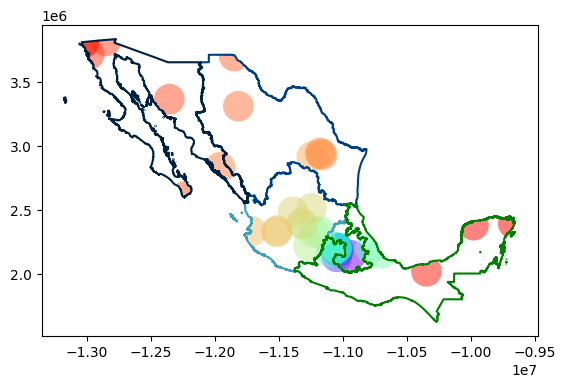

In [8]:
diss = estados.dissolve(by='region')
costco_bound = geopandas.overlay(diss, costco, how='intersection', keep_geom_type=False)
ax = diss.boundary.plot(cmap='ocean_r')

costco_bound.plot(ax=ax, cmap='rainbow', alpha=0.5)

**Punto 11**

Con la información del mapa regional sabemos que no es conveniento abrir una sucursal en el **Noreste** del país, pues las tiendas estan muy espaciadas y abrir una nueva no garanticza una intersección con las otras tiendas y no ampliaría la cobertura. El **Suroeste** (Chiapas, Guerrero, Oaxaca) tampoco cuenta con tiendas por lo que es evidente una falta de cobertura